In [1]:
import anndata as ad
import pandas as pd
import scanpy as sc
import seaborn as sns
import numpy as np
import scimap as sm
import matplotlib.pyplot as plt


Running SCIMAP  2.1.3


In [2]:
file = 'TS-373_IMC35_B_002'


In [4]:
path = f'/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/results/standard/merged_csv/{file}.csv'
df = pd.read_csv(path)
df.rename(columns={'centroid-0': 'Y_centroid', 'centroid-1': 'X_centroid', 'Object': 'CellID'}, inplace=True)
file_name_with_extension = path.split('/')[-1]
file_name = file_name_with_extension.split('.')[0]
export = f'/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/QC/phenotyping_{file_name}.csv'
df.to_csv(export, header=True, index=False)

In [37]:
df

,CellID,1,2,3,4,5,CD38,Perilipin,Vimentin,B4GALT1,...,191Ir,193Ir,6,area,Y_centroid,X_centroid,axis_major_length,axis_minor_length,eccentricity,distance_to_bone
0,1,4681.020426,11.307411,41.793680,19.825092,0.374137,2.634838,0.682026,13.994479,1.930260,...,3.086549,7.684618,0.212497,18,0.888889,240.166667,7.086920,3.235263,0.889717,228.816520
1,2,4700.992090,12.817145,41.391045,20.795537,0.281931,2.004741,1.102363,4.868091,2.617747,...,2.781383,7.421184,0.277666,15,0.866667,464.933333,6.183033,3.068313,0.868181,165.921668
2,3,4687.442208,13.376499,39.381714,15.955729,0.000000,1.274434,0.869270,5.975945,2.065213,...,4.474227,6.878499,0.391779,14,0.785714,607.214286,5.914327,3.043950,0.857386,52.801515
3,4,4723.075911,13.707328,46.122655,20.872919,0.133333,11.120078,1.334826,5.146717,2.060513,...,7.380573,11.368170,0.066667,15,0.866667,794.333333,5.963269,3.221366,0.841536,44.553339
4,5,4685.797886,15.347704,42.738773,20.606678,0.364511,0.989603,1.485596,2.827291,0.740270,...,1.983379,3.713892,0.000000,14,0.928571,173.857143,5.449354,3.145851,0.816540,173.066461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6277,6278,4902.931152,13.592571,48.319396,20.557254,0.166667,2.599580,1.295511,37.838733,4.073882,...,0.348834,1.381847,0.166667,6,998.500000,149.000000,3.265986,2.000000,0.790569,0.000000
6278,6279,4835.351807,12.460199,45.666136,19.850352,0.311083,12.011177,1.506191,8.007095,7.702869,...,8.183090,11.407312,0.384809,8,998.500000,180.500000,4.472136,2.000000,0.894427,10.049876
6279,6280,4700.973407,11.572630,42.377131,19.140223,0.076923,2.496298,0.573231,1.656264,0.593382,...,1.956161,2.998129,0.153846,13,998.153846,281.769231,5.547002,2.935198,0.848528,39.115214
6280,6281,4768.070801,12.346024,45.608850,21.441832,0.234273,2.750765,0.432348,2.365239,0.917453,...,1.155515,5.062991,0.375000,8,998.625000,847.625000,5.321869,1.782613,0.942232,129.247824


In [5]:
adata = sm.pp.mcmicro_to_scimap(export,split="area", CellId="CellID", drop_markers = ["HistoneH3", "CD98", " 1", " 2", " 3", " 4", " 5", " 6", "191Ir", "193Ir"])

Loading phenotyping_TS-373_IMC35_B_002.csv


In [9]:
adata.uns['all_markers']

[' 1',
 ' 2',
 ' 3',
 ' 4',
 ' 5',
 'CD38',
 'Perilipin',
 'Vimentin',
 'B4GALT1',
 'MPO',
 'CathepsinK',
 'ATP5A',
 'RUNX2',
 'HIF1A',
 'CD11b',
 'CD45',
 'CS',
 'CD11c',
 'CD36',
 'CD4',
 'CD34',
 'CD68',
 'IL32',
 'IDO',
 'CD8',
 'GranzymeK',
 'PKM2',
 'IRF4',
 'GLUT1',
 'GranzymeB',
 'Ki67',
 'CollagenTypeI',
 'CD3',
 'HistoneH3',
 'CPT1A',
 'CD98',
 'HLA-DR',
 'ST6GAL1',
 'CD138',
 '191Ir',
 '193Ir',
 ' 6']

In [5]:
adata.obs

,area,Y_centroid,X_centroid,axis_major_length,axis_minor_length,eccentricity,distance_to_bone,CellID,imageid
phenotyping_TS-373_IMC35_B_002_1,7,0.428571,94.285714,4.155375,1.905471,0.888666,244.135208,1,phenotyping_TS-373_IMC35_B_002
phenotyping_TS-373_IMC35_B_002_2,6,0.500000,188.000000,3.265986,2.000000,0.790569,247.196278,2,phenotyping_TS-373_IMC35_B_002
phenotyping_TS-373_IMC35_B_002_3,11,0.454545,244.272727,6.410748,1.964940,0.951868,265.000000,3,phenotyping_TS-373_IMC35_B_002
phenotyping_TS-373_IMC35_B_002_4,5,0.400000,529.200000,3.098387,1.788854,0.816497,430.675052,4,phenotyping_TS-373_IMC35_B_002
phenotyping_TS-373_IMC35_B_002_5,14,0.642857,577.071429,6.675032,2.859833,0.903571,464.961289,5,phenotyping_TS-373_IMC35_B_002
...,...,...,...,...,...,...,...,...,...
phenotyping_TS-373_IMC35_B_002_5459,83,995.542169,810.349398,11.770492,9.175876,0.626320,14.142136,5459,phenotyping_TS-373_IMC35_B_002
phenotyping_TS-373_IMC35_B_002_5460,55,996.054545,994.563636,10.493787,6.945557,0.749616,199.010050,5460,phenotyping_TS-373_IMC35_B_002
phenotyping_TS-373_IMC35_B_002_5461,56,996.571429,46.821429,11.125656,6.474076,0.813257,325.719204,5461,phenotyping_TS-373_IMC35_B_002
phenotyping_TS-373_IMC35_B_002_5462,64,996.296875,820.203125,11.473906,7.333427,0.769091,24.083189,5462,phenotyping_TS-373_IMC35_B_002


In [6]:
adata = adata[adata.obs['area'] >= 4]
image_path = '/'.join(path.split(sep="/")[:9]) + f"/img/{file_name}.tiff"
mask_path = '/'.join(path.split(sep="/")[:9]) + f"/masks/{file_name}.tiff"

In [7]:
marker_of_interest = 'CD45'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD98'], point_size=3, 
                   seg_mask = mask_path)
# 1.2

In [8]:
marker_of_interest = 'CD3'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD45', 'CD138', 'CD8', 'CD4'], point_size=3, 
                   seg_mask = mask_path)
#  1.3

In [9]:
marker_of_interest = 'CD4'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD3', 'CD138','CD8'], point_size=3, 
                   seg_mask = mask_path)
#  1.4

In [10]:
marker_of_interest = 'CD8'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD3', 'CD4' ], point_size=3, 
                   seg_mask = mask_path)
#  2.1

In [11]:
marker_of_interest = 'CD68'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD3', 'CD138', 'CD11b'], point_size=3, 
                   seg_mask = mask_path)
#  2.5

In [12]:
marker_of_interest = 'CD11b'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD3', 'CD138', 'MPO', 'CD68'], point_size=3, 
                   seg_mask = mask_path)
#  1.6

In [13]:
marker_of_interest = 'CD11c'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['CD138', 'CD3', 'HLA-DR'], point_size=3, 
                   seg_mask = mask_path)
#  0.6

In [14]:
marker_of_interest = 'HLA-DR'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['CD138', 'CD3', 'CD11c', 'CD68', 'CD11b'], point_size=3, 
                   seg_mask = mask_path)
#  1.4

In [15]:
marker_of_interest = 'CathepsinK'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD3', 'CollagenTypeI'], point_size=3, 
                   seg_mask = mask_path)
#  1.7

In [16]:
marker_of_interest = 'MPO'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD3', 'CD68', 'CD11b', 'CD45'], point_size=3, 
                   seg_mask = mask_path)
#  2.3

In [17]:
marker_of_interest = 'CD138'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD3', 'CD38', "CD68", "MPO"], point_size=3, 
                   seg_mask = mask_path)
#  1.0

In [18]:
marker_of_interest = 'CD38'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD3', 'CD138'], point_size=3, 
                   seg_mask = mask_path)
# 1.7

In [19]:
marker_of_interest = 'CD34'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD45', 'CD138'], point_size=3, 
                   seg_mask = mask_path)
# 0.7

In [20]:
marker_of_interest = 'RUNX2'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD45', 'CollagenTypeI'], point_size=3, 
                   seg_mask = mask_path)
# 0.8

In [21]:
marker_of_interest = 'Perilipin'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD45', 'CD36'], point_size=3, 
                   seg_mask = mask_path)
# 1.8

In [22]:
marker_of_interest = 'CD36'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD45', 'CD36'], point_size=3, 
                   seg_mask = mask_path)
# 2.5

In [ ]:
marker_of_interest = 'GranzymeB'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'MPO', 'CD68', 'CD3', 'CD8'], point_size=3, 
                   seg_mask = mask_path)
# 2.5

In [25]:
manual_gate = pd.read_csv(f'/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/src/Phenotyping/scimap/manual_gates_scimap.csv')
#manual_gate = pd.read_csv(f'/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/QC/Phenotypes/final_test_data/used/standard/{file}_manual_gates_scimap.csv')
adata = sm.pp.rescale (adata, gate=manual_gate)

GMM for ['phenotyping_TS-373_IMC35_B_002']
Finding the optimal gate by GMM for Perilipin
Finding the optimal gate by GMM for Vimentin
Finding the optimal gate by GMM for B4GALT1
Finding the optimal gate by GMM for ATP5A
Finding the optimal gate by GMM for HIF1A
Finding the optimal gate by GMM for CS
Finding the optimal gate by GMM for IL32
Finding the optimal gate by GMM for IDO
Finding the optimal gate by GMM for GranzymeK
Finding the optimal gate by GMM for PKM2
Finding the optimal gate by GMM for IRF4
Finding the optimal gate by GMM for GLUT1
Finding the optimal gate by GMM for GranzymeB
Finding the optimal gate by GMM for Ki67
Finding the optimal gate by GMM for CollagenTypeI
Finding the optimal gate by GMM for CPT1A
Finding the optimal gate by GMM for ST6GAL1
Scaling Image phenotyping_TS-373_IMC35_B_002
Scaling CD38
Scaling Perilipin
Scaling Vimentin
Scaling B4GALT1
Scaling MPO
Scaling CathepsinK
Scaling ATP5A
Scaling RUNX2
Scaling HIF1A
Scaling CD11b
Scaling CD45
Scaling CS
Scali

/Users/lukashat/miniforge3/envs/scimap/lib/python3.10/site-packages/scimap/preprocessing/rescale.py:100: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [26]:
%%capture
phenotype = pd.read_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/src/Phenotyping/scimap/phenotyping_scheme_scimap.csv')
adata = sm.tl.phenotype_cells (adata, phenotype=phenotype, label="phenotype") 

In [27]:
adata.obs['phenotype'].value_counts()

phenotype
Neutrophils                        2281
Plasma Cells/MM cells               682
MPO+                                643
Unknown                             515
CD45+                               404
Others                              388
CD8+Tcells                          123
CD4+Tcells                           81
Adipocytes                           73
CD68+                                66
Osteoblasts                          60
Endothelial cells                    39
Dendritic Cells                      34
activated Macrophages/Monocytes      31
HSCs                                 19
Macrophages/Monocytes                17
Osteoclasts                           6
Name: count, dtype: int64

In [ ]:
sm.pl.image_viewer(image_path, adata, overlay = 'phenotype', point_color='white', point_size=3, seg_mask = mask_path)

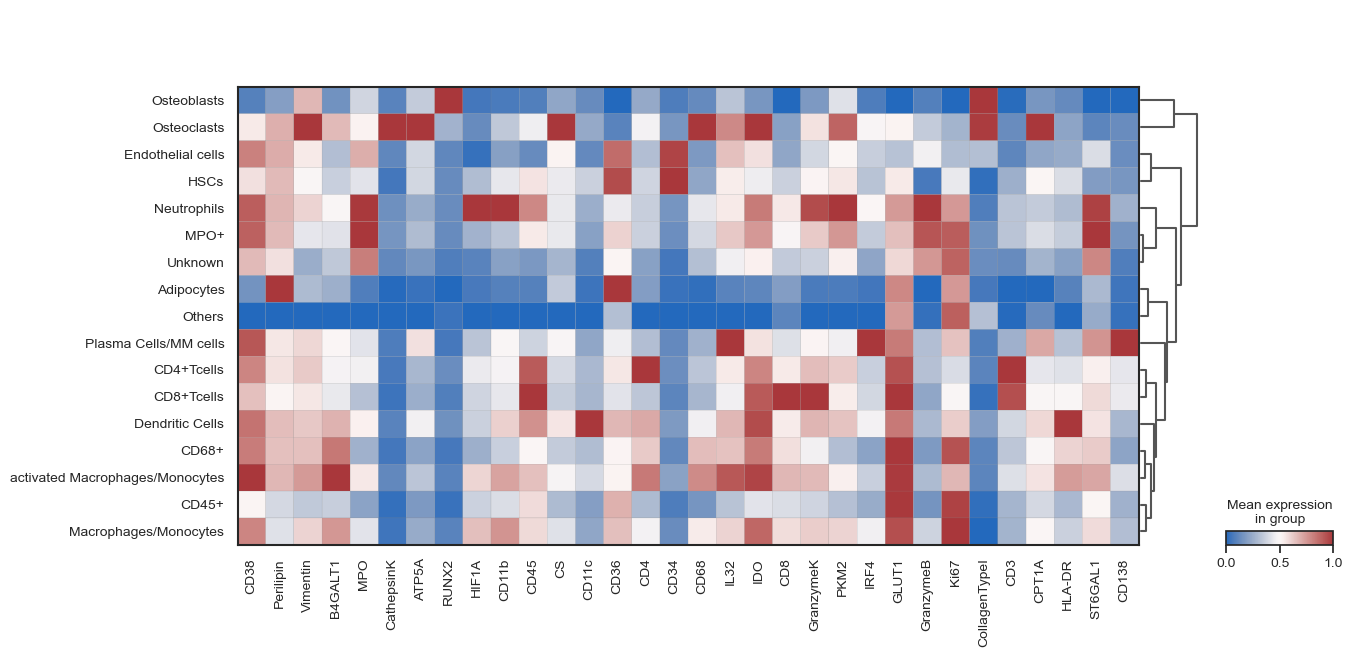

In [29]:
adata.obs['phenotype'] = adata.obs['phenotype'].astype('category')
sc.tl.dendrogram(adata, groupby='phenotype')
sc.pl.matrixplot(adata, var_names= adata.var.index, groupby='phenotype', dendrogram=True, use_raw=False, cmap="vlag", standard_scale='var')

In [32]:
# OPTIONAL! Remove unwanted categories
categories_to_remove = ["Osteoclasts"]#, "Unknown" "Others"]


adata = adata[~adata.obs['phenotype'].isin(categories_to_remove)]

In [30]:
#adata.write(f'/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/phenotyping/standard/{file_name}standard.h5ad')
adata.write(f'/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/phenotyping/manual_rephenotyping/{file_name}standard.h5ad')

In [31]:
manual_gate.to_csv(f'/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/phenotyping/manual_rephenotyping/{file}_manual_gates_scimap.csv', index=False)

In [26]:
# If taken for classifier tests
df = pd.concat([adata.to_df(),adata.obs], axis=1)

In [27]:
df

,CD38,Perilipin,Vimentin,B4GALT1,MPO,CathepsinK,ATP5A,RUNX2,HIF1A,CD11b,...,area,Y_centroid,X_centroid,axis_major_length,axis_minor_length,eccentricity,distance_to_bone,CellID,imageid,phenotype
phenotyping_TS-373_IMC79-1_B_002_1,0.662453,0.430719,0.183791,0.678576,0.171963,0.071958,0.325974,0.362419,0.426839,0.256217,...,5,0.400000,323.800000,3.098387,1.788854,0.816497,279.546061,1,phenotyping_TS-373_IMC79-1_B_002,Plasma Cells/MM cells
phenotyping_TS-373_IMC79-1_B_002_2,0.672179,0.405637,0.456869,0.449210,0.073111,0.039562,0.429618,0.079386,0.220547,0.334845,...,20,1.250000,339.300000,6.257452,4.099304,0.755536,286.782147,2,phenotyping_TS-373_IMC79-1_B_002,Plasma Cells/MM cells
phenotyping_TS-373_IMC79-1_B_002_3,0.562951,0.297558,0.709878,0.612324,0.186256,0.097789,0.646604,0.160210,0.174418,0.469198,...,17,1.235294,664.058824,5.415619,3.980897,0.677984,472.619297,3,phenotyping_TS-373_IMC79-1_B_002,Plasma Cells/MM cells
phenotyping_TS-373_IMC79-1_B_002_4,0.440154,0.196144,0.395249,0.256451,0.031406,0.073150,0.479894,0.030773,0.151072,0.177104,...,28,1.285714,817.500000,8.652002,4.120630,0.879303,388.573030,4,phenotyping_TS-373_IMC79-1_B_002,Plasma Cells/MM cells
phenotyping_TS-373_IMC79-1_B_002_5,0.800599,0.403043,0.430177,0.583603,0.117502,0.058283,0.470297,0.112197,0.110914,0.423156,...,41,2.365854,621.097561,8.040092,6.536175,0.582337,499.489740,5,phenotyping_TS-373_IMC79-1_B_002,Plasma Cells/MM cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
phenotyping_TS-373_IMC79-1_B_002_3421,0.505238,0.318521,0.192505,0.223211,0.658890,0.080879,0.159682,0.054043,0.184031,0.330378,...,90,966.033333,861.166667,13.431393,8.830624,0.753488,10.198039,3421,phenotyping_TS-373_IMC79-1_B_002,Unknown
phenotyping_TS-373_IMC79-1_B_002_3422,0.459425,0.308565,0.561545,0.312867,0.546004,0.131212,0.375114,0.091583,0.186293,0.452335,...,68,966.632353,896.750000,10.149386,8.551108,0.538658,45.122057,3422,phenotyping_TS-373_IMC79-1_B_002,CD68+
phenotyping_TS-373_IMC79-1_B_002_3423,0.465924,0.237956,0.021430,0.133664,0.612161,0.096924,0.052519,0.048525,0.086340,0.205691,...,53,969.377358,869.150943,9.960551,7.049231,0.706498,18.681542,3423,phenotyping_TS-373_IMC79-1_B_002,Unknown
phenotyping_TS-373_IMC79-1_B_002_3424,0.678791,0.425670,0.457784,0.611159,0.233213,0.145729,0.771197,0.123886,0.220810,0.325618,...,102,987.549020,973.470588,11.958292,10.969025,0.398258,123.939501,3424,phenotyping_TS-373_IMC79-1_B_002,Plasma Cells/MM cells


In [28]:
df['phenotype'] = df['phenotype'].replace({
    'mDCs': 'Dendritic Cells',
    'Others': 'Unknown',
    'CD45+': 'Unknown',
})

/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_83603/2001063246.py:1: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.



In [29]:
df

,CD38,Perilipin,Vimentin,B4GALT1,MPO,CathepsinK,ATP5A,RUNX2,HIF1A,CD11b,...,area,Y_centroid,X_centroid,axis_major_length,axis_minor_length,eccentricity,distance_to_bone,CellID,imageid,phenotype
phenotyping_TS-373_IMC79-1_B_002_1,0.662453,0.430719,0.183791,0.678576,0.171963,0.071958,0.325974,0.362419,0.426839,0.256217,...,5,0.400000,323.800000,3.098387,1.788854,0.816497,279.546061,1,phenotyping_TS-373_IMC79-1_B_002,Plasma Cells/MM cells
phenotyping_TS-373_IMC79-1_B_002_2,0.672179,0.405637,0.456869,0.449210,0.073111,0.039562,0.429618,0.079386,0.220547,0.334845,...,20,1.250000,339.300000,6.257452,4.099304,0.755536,286.782147,2,phenotyping_TS-373_IMC79-1_B_002,Plasma Cells/MM cells
phenotyping_TS-373_IMC79-1_B_002_3,0.562951,0.297558,0.709878,0.612324,0.186256,0.097789,0.646604,0.160210,0.174418,0.469198,...,17,1.235294,664.058824,5.415619,3.980897,0.677984,472.619297,3,phenotyping_TS-373_IMC79-1_B_002,Plasma Cells/MM cells
phenotyping_TS-373_IMC79-1_B_002_4,0.440154,0.196144,0.395249,0.256451,0.031406,0.073150,0.479894,0.030773,0.151072,0.177104,...,28,1.285714,817.500000,8.652002,4.120630,0.879303,388.573030,4,phenotyping_TS-373_IMC79-1_B_002,Plasma Cells/MM cells
phenotyping_TS-373_IMC79-1_B_002_5,0.800599,0.403043,0.430177,0.583603,0.117502,0.058283,0.470297,0.112197,0.110914,0.423156,...,41,2.365854,621.097561,8.040092,6.536175,0.582337,499.489740,5,phenotyping_TS-373_IMC79-1_B_002,Plasma Cells/MM cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
phenotyping_TS-373_IMC79-1_B_002_3421,0.505238,0.318521,0.192505,0.223211,0.658890,0.080879,0.159682,0.054043,0.184031,0.330378,...,90,966.033333,861.166667,13.431393,8.830624,0.753488,10.198039,3421,phenotyping_TS-373_IMC79-1_B_002,Unknown
phenotyping_TS-373_IMC79-1_B_002_3422,0.459425,0.308565,0.561545,0.312867,0.546004,0.131212,0.375114,0.091583,0.186293,0.452335,...,68,966.632353,896.750000,10.149386,8.551108,0.538658,45.122057,3422,phenotyping_TS-373_IMC79-1_B_002,CD68+
phenotyping_TS-373_IMC79-1_B_002_3423,0.465924,0.237956,0.021430,0.133664,0.612161,0.096924,0.052519,0.048525,0.086340,0.205691,...,53,969.377358,869.150943,9.960551,7.049231,0.706498,18.681542,3423,phenotyping_TS-373_IMC79-1_B_002,Unknown
phenotyping_TS-373_IMC79-1_B_002_3424,0.678791,0.425670,0.457784,0.611159,0.233213,0.145729,0.771197,0.123886,0.220810,0.325618,...,102,987.549020,973.470588,11.958292,10.969025,0.398258,123.939501,3424,phenotyping_TS-373_IMC79-1_B_002,Plasma Cells/MM cells


In [30]:
df.to_csv(f'/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/QC/Phenotypes/final_test_data/CSVs/{file}.csv')